# Homework 1 - Ben DuPey - STAT341A

In [21]:
## Importing Libararies 

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
import statsmodels.api as sm
from statsmodels.formula.api import ols
#

In [22]:
# Reading in df
df = pd.read_csv('table_b_1.csv')

# Question 2.1.a)

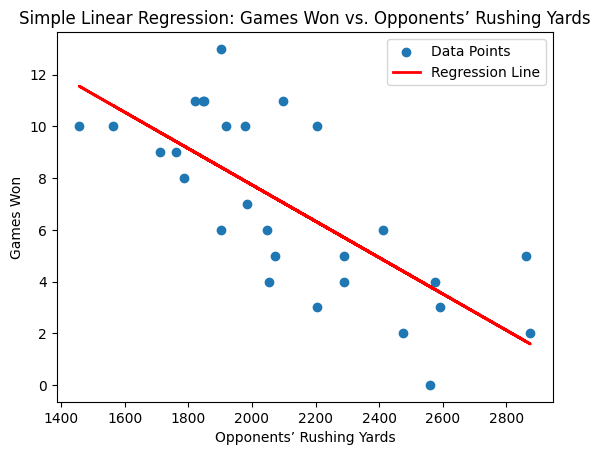

Intercept: 21.788250882413028
Coefficient (slope): -0.007025100276006444


In [60]:
# Create and fit the linear regression model
X = df[['x8']]  # Independent variable
y = df['y']      # Dependent variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the model
predictions = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, label='Data Points')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Opponents’ Rushing Yards')
plt.ylabel('Games Won')
plt.legend()
plt.title('Simple Linear Regression: Games Won vs. Opponents’ Rushing Yards')
plt.show()

# Print the coefficients of the linear regression model
print('Intercept:', model.intercept_)
print('Coefficient (slope):', model.coef_[0])

# Question 2.1.b

In [61]:
# Fit a linear regression model
model = ols('y ~ x8', data=df).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     31.10
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           7.38e-06
Time:                        12:45:07   Log-Likelihood:                -63.123
No. Observations:                  28   AIC:                             130.2
Df Residuals:                      26   BIC:                             132.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.7883      2.696      8.081      0.0

# Question 2.1.c)

In [45]:

print("\nQuestion 2.1.c")
# Calculate the 95% confidence interval for the slope
slope_ci = model.conf_int(alpha=0.05)

# Print the confidence interval for the slope (x8)
print(f'95% Confidence Interval for the Slope of x8:')
print(slope_ci.loc['x8'])


Question 2.1.c
95% Confidence Interval for the Slope of x8:
0   -0.009614
1   -0.004436
Name: x8, dtype: float64


# Question 2.1.d)

In [64]:
# Fit a linear regression model
model = ols('y ~ x8', data=df).fit()

# Get the 95% confidence interval on the slope
ci = model.conf_int(alpha=0.05)
print(ci)
print("95% CI = [-0.009614, -0.004436]")

                   0          1
Intercept  16.246064  27.330438
x8         -0.009614  -0.004436
95% CI = [-0.009614, -0.004436]


# Question 2.1.e)

In [68]:
# Specify the value of x8 for which you want to predict the mean number of games won
x8_value = 2000

# Create a DataFrame with the specified x8 value
predict_data = pd.DataFrame({'x8': [x8_value]})

# Use the model to make predictions
predictions = model.get_prediction(predict_data)

# Get the 95% confidence interval for the mean
ci = predictions.summary_frame(alpha=0.05)
lower_bound = ci.iloc[0]['obs_ci_lower']
upper_bound = ci.iloc[0]['obs_ci_upper']

print(f"95% CI on the mean number of games won when x8 = {x8_value} yards: [{lower_bound:.2f}, {upper_bound:.2f}]")

95% CI on the mean number of games won when x8 = 2000 yards: [2.72, 12.75]


# Question 2.2)

In [69]:
# Fit a linear regression model
model = ols('y ~ x8', data=df).fit()

# Specify the value of x8 for which you want to make a prediction
x8_value = 1800

# Create a DataFrame with the specified x8 value
predict_data = pd.DataFrame({'x8': [x8_value]})

# Use the model to make a point estimate prediction
point_estimate = model.predict(predict_data).iloc[0]

# Calculate a 90% prediction interval
prediction_interval = model.get_prediction(predict_data).summary_frame(alpha=0.10)
lower_bound = prediction_interval.iloc[0]['obs_ci_lower']
upper_bound = prediction_interval.iloc[0]['obs_ci_upper']

print(f"Point estimate of games won when x8 = {x8_value} yards: {point_estimate:.2f}")
print(f"90% Prediction interval on games won: [{lower_bound:.2f}, {upper_bound:.2f}]")

Point estimate of games won when x8 = 1800 yards: 9.14
90% Prediction interval on games won: [4.94, 13.35]


# Question 2.4)

In [4]:
df=pd.read_csv('table_b_3.csv')
df.head()

,Automobile,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,Apollo,18.90,350.0,165,260.0,8.0 : 1,2.56 : 1,4,3,200.3,69.9,3910,A
1,Omega,17.00,350.0,170,275.0,8.5 : 1,2.56 : 1,4,3,199.6,72.9,2860,A
2,Nova,20.00,250.0,105,185.0,8.25 : 1,2.73 : 1,1,3,196.7,72.2,3510,A
3,Monarch,18.25,351.0,143,255.0,8.0 : 1,3.00 : 1,2,3,199.9,74.0,3890,A
4,Duster,20.07,225.0,95,170.0,8.4 : 1,2.76 : 1,1,3,194.1,71.8,3365,M


# Question 2.4.a)

Coefficient (slope): -0.04742828204518296
Intercept (y-intercept): 33.7274390320775


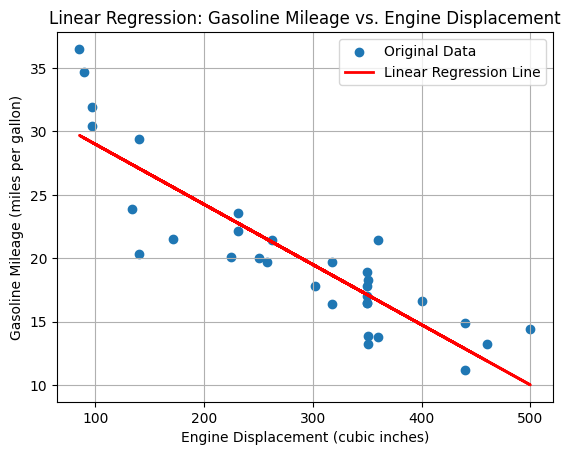

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded as 'df'

# Extract the 'x1' (engine displacement) and 'y' (gasoline mileage) columns
X = df[['x1']]  # Feature (Independent variable)
y = df['y']     # Target (Dependent variable)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients of the linear regression equation (y = mx + b)
slope = model.coef_[0]
intercept = model.intercept_
print(f'Coefficient (slope): {slope}')
print(f'Intercept (y-intercept): {intercept}')

# Make predictions using the model
y_pred = model.predict(X)

# Plot the original data points and the regression line
plt.scatter(X, y, label='Original Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Engine Displacement (cubic inches)')
plt.ylabel('Gasoline Mileage (miles per gallon)')
plt.title('Linear Regression: Gasoline Mileage vs. Engine Displacement')
plt.legend()
plt.grid(True)
plt.show()


# Question 2.4.b)

In [7]:
# Create a formula for the linear regression model
formula = 'y ~ x1'

# Fit the linear regression model using statsmodels formula API
model = ols(formula=formula, data=df).fit()

# Print the summary of the regression analysis
print(model.summary())

# Extract the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print("\nAnalysis of Variance (ANOVA) Table:")
print(anova_table)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           3.82e-11
Time:                        12:28:37   Log-Likelihood:                -80.236
No. Observations:                  32   AIC:                             164.5
Df Residuals:                      30   BIC:                             167.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.7274      1.446     23.332      0.0

# Question 2.4.c)

In [8]:
# Calculate R-squared (coefficient of determination)
r_squared = model.rsquared

# Calculate the percentage of variability explained
percentage_variability_explained = r_squared * 100

# Print the result
print(f"Percent of Total Variability Explained: {percentage_variability_explained:.2f}%")


Percent of Total Variability Explained: 77.20%


# Question 2.4.d)

In [9]:
import numpy as np

# Define the engine displacement value for which you want to find the confidence interval
engine_displacement_value = 275

# Create a DataFrame with the constant and the specified engine displacement
data_point = pd.DataFrame({'const': 1, 'x1': [engine_displacement_value]})

# Use the model to predict the gasoline mileage for the specified engine displacement
predicted_mileage = model.predict(data_point)

# Get the standard error of the estimate
std_error = np.sqrt(model.mse_resid)

# Define the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the critical value for the confidence interval
from scipy.stats import t
degrees_of_freedom = len(X) - model.df_model - 1
critical_value = t.ppf((1 + confidence_level) / 2, df=degrees_of_freedom)

# Calculate the margin of error
margin_of_error = critical_value * std_error

# Calculate the confidence interval
lower_bound = predicted_mileage - margin_of_error
upper_bound = predicted_mileage + margin_of_error

# Print the confidence interval
print(f"95% Confidence Interval on Mean Gasoline Mileage (when x1 = {engine_displacement_value} cubic inches):")
print(f"Lower Bound: {lower_bound[0]:.2f} miles per gallon")
print(f"Upper Bound: {upper_bound[0]:.2f} miles per gallon")


95% Confidence Interval on Mean Gasoline Mileage (when x1 = 275 cubic inches):
Lower Bound: 14.42 miles per gallon
Upper Bound: 26.95 miles per gallon


# Question 2.4.e)

In [10]:
# Define the engine displacement value for which you want to make a prediction
engine_displacement_value = 275

# Create a DataFrame with the constant and the specified engine displacement
data_point = pd.DataFrame({'const': 1, 'x1': [engine_displacement_value]})

# Use the model to get a prediction and prediction interval
prediction = model.get_prediction(data_point)

# Extract the point estimate and prediction interval
point_estimate = prediction.predicted_mean[0]
prediction_interval = prediction.conf_int(alpha=0.05)[0]

# Print the point estimate and prediction interval
print(f"Point Estimate of Mileage (when x1 = {engine_displacement_value} cubic inches): {point_estimate:.2f} miles per gallon")
print(f"95% Prediction Interval on Mileage:")
print(f"Lower Bound: {prediction_interval[0]:.2f} miles per gallon")
print(f"Upper Bound: {prediction_interval[1]:.2f} miles per gallon")

Point Estimate of Mileage (when x1 = 275 cubic inches): 20.68 miles per gallon
95% Prediction Interval on Mileage:
Lower Bound: 19.57 miles per gallon
Upper Bound: 21.80 miles per gallon


# Question 2.4.f)

In [ ]:
# The  difference  is that the confidence interval is estimating the range of the population mean (average mileage for all cars with a 275-in.³ engine), which can be quite wide
# due to sample variability. In contrast, the prediction interval is estimating the range of a single observation (the mileage of one specific car with that engine size), and it 
# is narrower because it is focused on predicting a specific value rather than summarizing a population parameter.

# Question 2.7)

In [23]:
df=pd.read_csv('question_2_7.csv')
df.head()

,Purity (%),Hydrocarbon (%)
0,86.91,1.02
1,89.85,1.11
2,90.28,1.43
3,86.34,1.11
4,92.58,1.01


# Question 2.7.a)

In [12]:
# Extract the independent variable (X) and dependent variable (y)
X = df[['Purity (%)']]
y = df['Hydrocarbon (%)']

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients of the linear regression equation (y = mx + b)
slope = model.coef_[0]
intercept = model.intercept_
print(f'Coefficient (slope): {slope}')
print(f'Intercept (y-intercept): {intercept}')

Coefficient (slope): 0.03297360191329696
Intercept (y-intercept): -1.8450701804751002


# Question 2.7.b)

In [13]:
import statsmodels.api as sm

# Add a constant term to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Perform the t-test for the coefficient of 'Purity (%)'
t_statistic = model.tvalues['Purity (%)']
p_value = model.pvalues['Purity (%)']

# Define the significance level (e.g., alpha = 0.05)
alpha = 0.05

# Print the results of the hypothesis test
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis (H_0: β_1 = 0)")
else:
    print("Fail to reject the null hypothesis (H_0: β_1 = 0)")


T-Statistic: 3.3861
P-Value: 0.0033
Reject the null hypothesis (H_0: β_1 = 0)


# Question 2.7.c)

In [14]:
from sklearn.linear_model import LinearRegression

# Assuming your linear regression model is already fitted
# Initialize the Linear Regression model (if not already done)
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)  # Assuming X and y are your independent and dependent variables

# Calculate R-squared
r_squared = model.score(X, y)

# Print the R-squared value
print(f"R-squared: {r_squared:.4f}")


R-squared: 0.3891


# Question 2.7.d)

In [15]:
import statsmodels.api as sm

# Add a constant term to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the confidence intervals for the model parameters
confidence_intervals = model.conf_int(alpha=0.05)

# Extract the confidence interval for the slope (beta1)
slope_ci = confidence_intervals.loc['Purity (%)']

# Print the confidence interval for the slope
print(f"95% Confidence Interval on the Slope (beta1):")
print(f"Lower Bound: {slope_ci[0]:.4f}")
print(f"Upper Bound: {slope_ci[1]:.4f}")


95% Confidence Interval on the Slope (beta1):
Lower Bound: 0.0125
Upper Bound: 0.0534


# Question 2.7.e)

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy import stats

# Your dataframe
data = {
    "Purity (%)": [
        86.91, 89.85, 90.28, 86.34, 92.58, 87.33, 86.29, 91.86, 95.61, 89.86,
        96.73, 99.42, 98.66, 96.07, 93.65, 87.31, 95.00, 96.85, 85.20, 90.56
    ],
    "Hydrocarbon (%)": [
        1.02, 1.11, 1.43, 1.11, 1.01, 0.95, 1.11, 0.87, 1.43, 1.02,
        1.46, 1.55, 1.55, 1.55, 1.40, 1.15, 1.01, 0.99, 0.95, 0.98
    ]
}

df = pd.DataFrame(data)

# Filter the DataFrame to select rows where Hydrocarbon (%) is 1.00
subset_df = df[df['Hydrocarbon (%)'] == 1.00]

# Check if there are any rows left in the subset
if not subset_df.empty:
    # Extract the features (Hydrocarbon (%)) and target (Purity (%))
    X = subset_df[['Hydrocarbon (%)']]
    y = subset_df['Purity (%)']

    # Create and fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict the mean purity for Hydrocarbon (%) = 1.00
    predicted_mean_purity = model.predict([[1.00]])

    # Calculate the standard error of the estimate
    residuals = y - model.predict(X)
    se_estimate = np.std(residuals) / np.sqrt(len(residuals))

    # Calculate the 95% confidence interval
    margin_of_error = stats.norm.ppf(0.975) * se_estimate
    confidence_interval = (predicted_mean_purity - margin_of_error, predicted_mean_purity + margin_of_error)

    print("Predicted Mean Purity:", predicted_mean_purity[0])
    print("95% Confidence Interval:", confidence_interval)
else:
    print("No data with Hydrocarbon (%) = 1.00 found in the DataFrame.")


Predicted Mean Purity: 89.66431235475011
95% Confidence Interval: (array([88.16896658]), array([91.15965813]))


c:\Users\mason\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
